# Examen 1 - 27 febrero 2017

In [1]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

#### [1] 
En esta pregunta, escribiremos una función para calcular $\log(n!)$, es decir, el logaritmo del factorial de un número $n$.

#### (i) 
Utiliza un bucle `for` para escribir una función `log_factorial` que toma un argumento `n` y que calcula el logaritmo del factorial de `n`. Para hacerlo, recuerda que el logaritmo de un producto es la suma de los logaritmos. [La función "logaritmo" en Julia se llama `log`.]

In [3]:
?factorial;

search: factorial Factorization factorize



In [5]:
doc"""
La función log_factorial(n) calcula el factorial de n y le aplica la función logartimo
"""

function log_factorial(n)
    fact = []
    
    for i in 0:n-1
        fac = big(n - i) 
        push!(fact, fac)
    end
    f = prod(fact)
    l = log(f)
    return l
end

log_factorial

In [6]:
# Prueba de la función log_factorial
log_factorial(3)

1.791759469228055000812477358380702272722990692183004705855374343130887915188299

In [7]:
# Prueba utilizando las funciones de Julia
log(factorial(3))

1.791759469228055

(ii) Utiliza una comprensión de arreglo para calcular $\log(n!)$ para $n$ de 1 a 100.

In [8]:
log_factorial(30)

7.465823634883016438548764373417796663627184480113549974868022690082816252869778e+01

In [9]:
log_factorial(60)

1.886281734236715911872884103898359167487350022133071538333295831157244702253845e+02

In [10]:
factorial(big(60))

8320987112741390144276341183223364380754172606361245952449277696409600000000000000

In [11]:
log(ans)

1.886281734236715911872884103898359167487350022133071538333295831157244702253845e+02

In [12]:
typeof(ans)

BigFloat

In [13]:
A = [log_factorial(n) for n in 1:100]

100-element Array{BigFloat,1}:
 0.000000000000000000000000000000000000000000000000000000000000000000000000000000    
 6.931471805599453094172321214581765680755001343602552541206800094933936219696955e-01
 1.791759469228055000812477358380702272722990692183004705855374343130887915188299    
 3.17805383034794561964694160129705540887399096090351521409673436211767515912769     
 4.787491742782045994247700934523243048399592315172032936009382253591854146835361    
 6.57925121201010099506017829290394532112258300735503764186475659672274206202366     
 8.52516136106541430016553103634712505075966773693689883032414674666032192477571     
 1.060460290274525022841722740072165475498616814001766459268618677514050279068476e+01
 1.280182748008146961120771787456670616428114925566316349615557544241549137712204e+01
 1.510441257307551529522570932925107037188225074429193647218890334338306398679944e+01
 1.750230784587388583928765290721619967170395759822935364740747105251363761071257e+01
 1.99872144956618861495

In [14]:
B = collect(1:100);

In [15]:
typeof(A)

Array{BigFloat,1}

(iii) Dibuja esta cantidad en función de $n$. ¿Cualitativamente, cuál parece ser su tasa de crecimiento? ¿Qué implica esto sobre la tasa de crecimiento de $n!$?


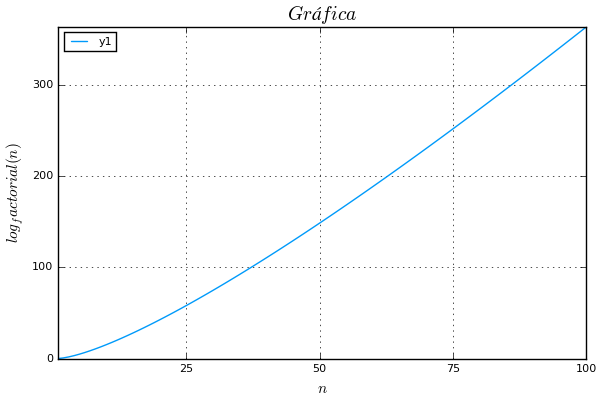

In [16]:
plot(B, A, xlabel=L"n", ylabel=L"log_factorial(n)", title=L"Gráfica")

[2] Considera la suma de los cuadrados de los primeros $n$ enteros positivos,

$$S_n := \sum_{i=1}^n i^2.$$

Escriba una función que acepta un número $M$ y encuentra el valor mínimo de $n$ tal que $S_n > M$, es decir, tal que la suma exceda el valor dado.

In [17]:
?minimum;

search: minimum minimum! DimensionMismatch



In [18]:
doc"""
La función suma_cuad de parámetros M y n, donde M es un número cualquiera y n es un número entero, 
calcula la suma de los cuadrados de los n primeros enteros. La función regresa la suma y el mínimo valor entero
tal que la suma de los cuadrados S_n es mayor a M, i.e., tal que S_n > M.
"""

function suma_cuad(M, n::Int64)
    s_n = 0
    N = Int64[]
    
    for i in 1:3
        s_n += i^2
        if s_n > M
            push!(N, i)
        end
        #@show i, s_n, N
    end
    
    return s_n, N[1]
    
end

suma_cuad

In [19]:
# Prueba de la función suma_cuad
suma_cuad(1, 3)

(14,2)

[3] (i) Escribe una función `f` que toma un valor de $x$ y calcula la serie

$$f(x) = \sum_{n=1}^{\infty} \frac{x^n}{n}.$$

Toma el número de términos $N(x)$ que sea necesario hasta que el tamaño del último término sea menor a una tolerancia.

In [20]:
doc"""
La función serie(x, tol) tiene como parámetros x y una cierta tolerancia. 
Regresa la suma de los términos $\frac{x^n}{n}$ desde 1 hasta que el último de los términos 
sea menor a la tolerancia que se le dio.
"""

function serie(x, tol)
    # Creo un arreglo vacío, donde meteré los valores de f
    fact = []
    i = 1
    f = x^i / i # Primer término de la suma
    push!(fact, f) # Agrego el primer término al arreglo fact
   
    while f > tol # Mientras f es mayor que la tolerancia calcula f
        f = x^i / i
        push!(fact, f) 
        i = i +1
    end
    # Suma todos los valores del arreglo fact
    suma = sum(fact)
    return suma
end

serie

In [21]:
serie(1, 0.9)

2.5


El primer término $f$ que va al arreglo $fact$ es 

$f = \frac{x^1}{1}$ y como $x = 1$ entonces $f = 1$,

como esto es mayor que la tolerancia de $0.9$, debería continuar calculando el siguiente término de $f$.

El siguiente término $f$ es 

$f = \frac{x^2}{ 2} = \frac{1}{2}$ 

y esto es menor que la tolerancia, así que ahí debería terminar el ciclo. 

Por lo tanto, el resultado es $f(x) = 1 + \frac{1}{2}$


In [22]:
# Prueba
serie(1, 0.1)

3.928968253968254

(ii) Dibuja la función $f(x)$ en función de $x$, para $x$ de $-0.9$ a $0.9$.

In [23]:
# Creo los arreglos para después graficarlos
a = [serie(x, 0.001) for x in -0.9:0.032:0.9];
b = collect(-0.9:0.032:0.9);


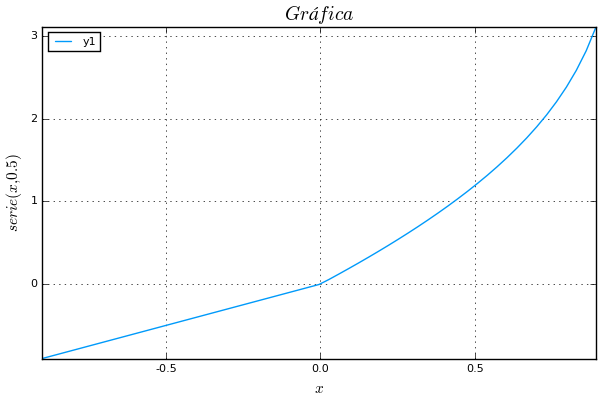

In [24]:
plot(b, a, xlabel=L"x", ylabel=L"serie(x, 0.5)", title=L"Gráfica")

(iii) Alguien sugiere que la función $f(x)$ podría ser realmente $-\log(1-x)$. ¿Qué deberías dibujar en función de qué para que salga una recta? Verifica que sí sea cierto.